In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
def weighted_sd(input_df):
    weights = input_df["value"].fillna(0) / input_df["value"].sum()
    vals = input_df["rate"].fillna(0)
    weighted_avg = np.average(vals, weights=weights)
    # print(vals, weights, weighted_avg)
    numer = np.sum(weights * (vals - weighted_avg)**2)
    denom = ((vals.count()-1)/vals.count())*np.sum(weights)
    return np.sqrt(numer)
    return np.sqrt(numer/denom)

In [39]:
VOTES_POLLING = 100
RATE_THRESHOLD = 0.02
output = []

method = "std"
for year in [1952, 1958, 1964, 1970]:
    df = pd.read_csv(f"data_output/Chile/{year}_first_round.csv.gz")
    ee = df.groupby("polling_id").agg({"value": "sum"})
    # values_polling = list(ee[ee["value"] > VOTES_POLLING].index.unique())
    dd = df.groupby("candidate").agg({"value": "sum"})
    dd["rate"] = dd.apply(lambda x: x/x.sum())
    # values = list(dd[dd["rate"] > RATE_THRESHOLD].index.unique())
    # print()
    # df = df[df["polling_id"].isin(values_polling)].copy()
    # df = df[df["candidate"].isin(values)].copy()

    N = len(df["candidate"].unique())
    print(year, ": ", len(df.Comunas.unique()))
    print(df["candidate"].unique())
    # display(df)

    value = df.groupby("candidate").apply(weighted_sd).sum()
    # display(df)
    # value = df.groupby("candidate").agg({"rate": "std"}).sum()["rate"]
    

    output.append({
        "year": year,
        "N": N,
        "value": value
    })

df = pd.DataFrame(output)
df

1952 :  397
['Pedro Enrique Alfonso Berríos' 'Salvador Allende Gossens'
 'Carlos Ibañez del Campo' 'Arturo Matte Larraín']
1958 :  413
['Jorge Alessandri' 'Luis Bossay' 'Antonio Zamorano' 'Salvador Allende'
 'Eduardo Frei']
1964 :  441
['Salvador Allende' 'Eduardo Frei' 'Luis Durán']
1970 :  458
['Tomic' 'Alessandri' 'Allende']


,year,N,value
0,1952,4,0.432016
1,1958,5,0.433502
2,1964,3,0.229287
3,1970,3,0.246566


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


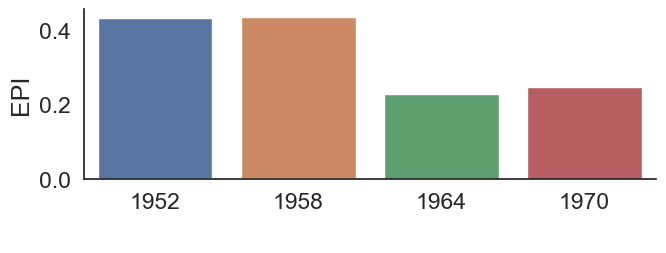

In [36]:
sns.set(font_scale=1.5, style="white")
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 3))
linestyles = ["dotted", "dashed", "dashdot"]
palette = ["orange", "blue", "red"]
idx = 0
sns.barplot(
    x="year", 
    y="value", 
    # color=palette[idx], 
    # linestyle=linestyles[idx],
    # marker="o", 
    # lw=2, 
    # hue="country", 
    data=df
)
idx += 1
sns.despine()
ax.set_xlabel("")
ax.set_ylabel("EPI")
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3, frameon=False)
fig.tight_layout()

In [29]:
df = pd.read_csv(f"data_output/Chile/1952_first_round.csv.gz")
df.sort_values("polling_id").head()

,Provincia,Depto.,Comunas,polling_id,candidate,value,rank,rate
80,ACONCAGUA,Los Andes,CALLE LARGA,ACONCAGUA-Los Andes-CALLE LARGA,Pedro Enrique Alfonso Berríos,120.0,3,0.126316
874,ACONCAGUA,Los Andes,CALLE LARGA,ACONCAGUA-Los Andes-CALLE LARGA,Carlos Ibañez del Campo,343.0,2,0.361053
477,ACONCAGUA,Los Andes,CALLE LARGA,ACONCAGUA-Los Andes-CALLE LARGA,Salvador Allende Gossens,6.0,4,0.006316
1271,ACONCAGUA,Los Andes,CALLE LARGA,ACONCAGUA-Los Andes-CALLE LARGA,Arturo Matte Larraín,481.0,1,0.506316
1269,ACONCAGUA,Los Andes,LOS ANDES,ACONCAGUA-Los Andes-LOS ANDES,Arturo Matte Larraín,1388.0,3,0.258569


In [31]:
df.groupby("candidate").agg({"rate": "std"})

,rate
candidate,
Arturo Matte Larraín,0.170498
Carlos Ibañez del Campo,0.163468
Pedro Enrique Alfonso Berríos,0.124203
Salvador Allende Gossens,0.058417


In [32]:
df.groupby("candidate").apply(weighted_sd)

candidate
Arturo Matte Larraín             0.146237
Carlos Ibañez del Campo          0.111021
Pedro Enrique Alfonso Berríos    0.103039
Salvador Allende Gossens         0.072264
dtype: float64